In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

[INFO] Exp. name : asr_example_sd0                                                                         
[INFO] Loading data... large corpus may took a while.                                                      
[INFO] Data spec. | Corpus = Librispeech (from /media/zwan074/Untitled/libriSpeech)                        
[INFO]            | Train sets = ['train-clean-100 (copy)']	| Number of utts = 455                         
[INFO]            | Dev sets = ['dev-clean (another copy)']	| Number of utts = 235                         
[INFO]            | Batch size = 16		| Bucketing = True                                                    
[INFO] I/O spec.  | Audio feature = log mel freq	| feature dim = 80	| Token type = subword	| Vocab size = 16000


/home/zwan074/anaconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/zwan074/anaconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/zwan074/anaconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning

torch.Size([16, 620, 80])
torch.Size([620, 80])
tensor([[-17.8079, -15.9519, -18.3061,  ...,   0.0000,   0.0000,   0.0000],
        [-17.9880, -16.1320, -17.8189,  ...,   0.0000,   0.0000,   0.0000],
        [-18.0478, -16.1918, -17.3232,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]])


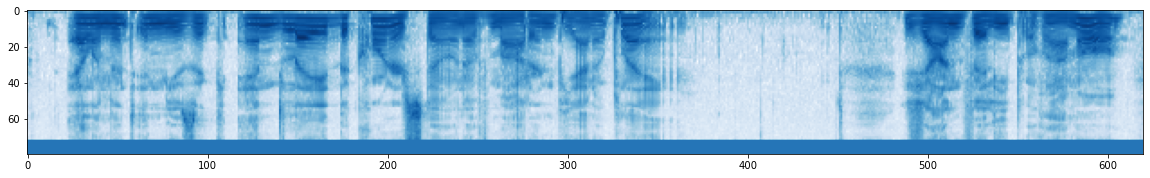

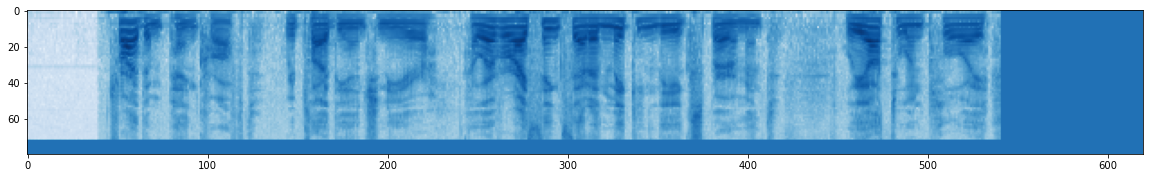

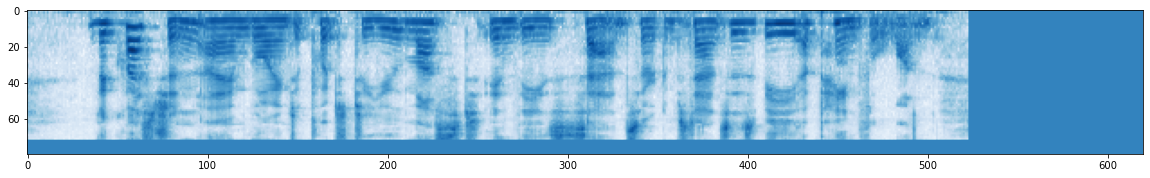

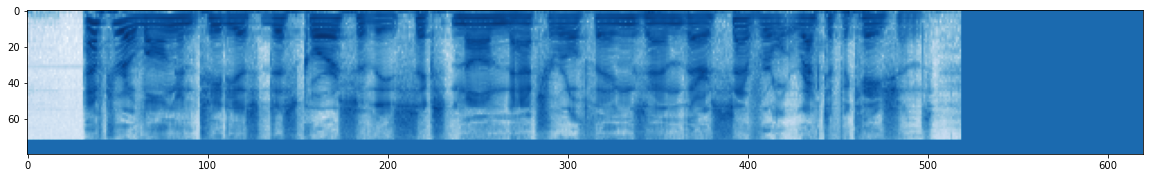

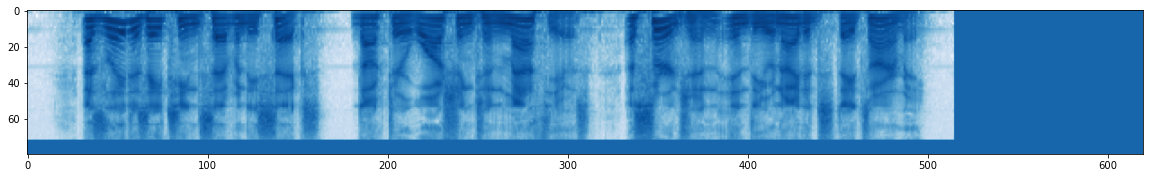

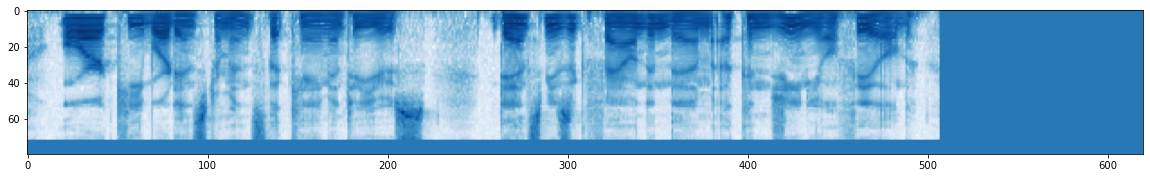

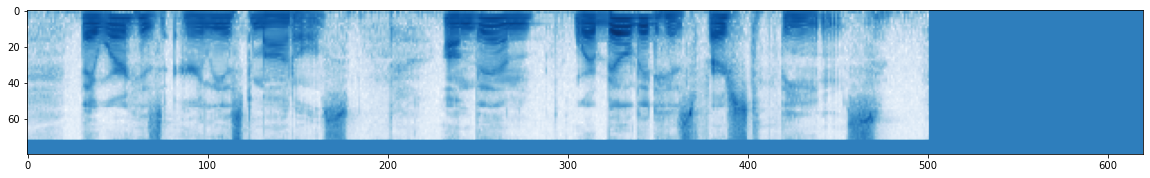

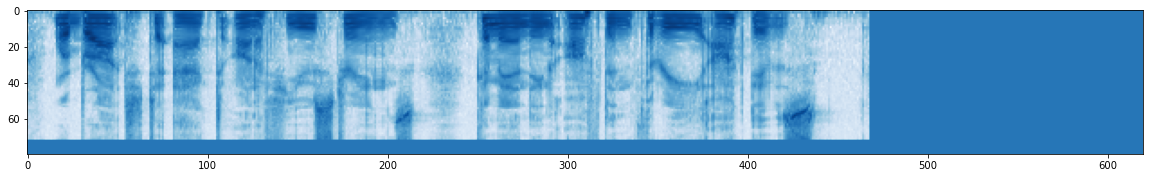

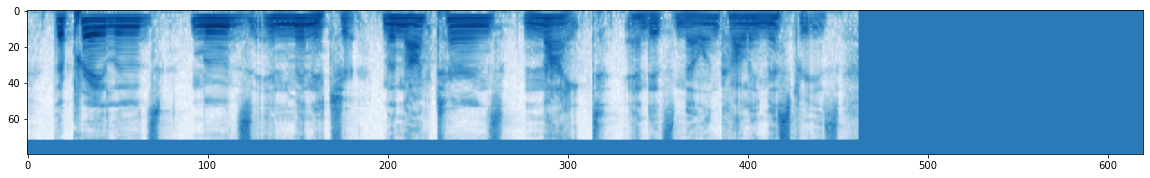

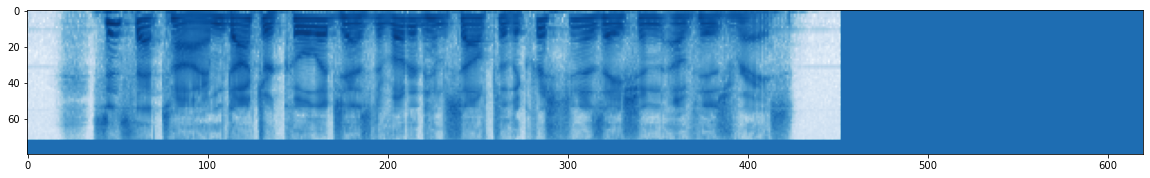

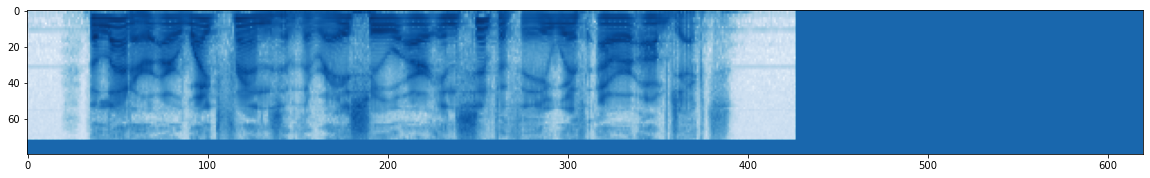

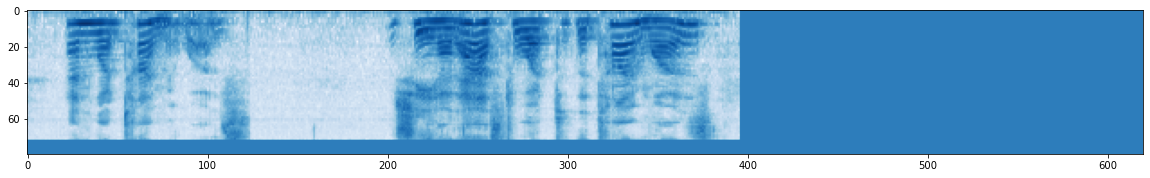

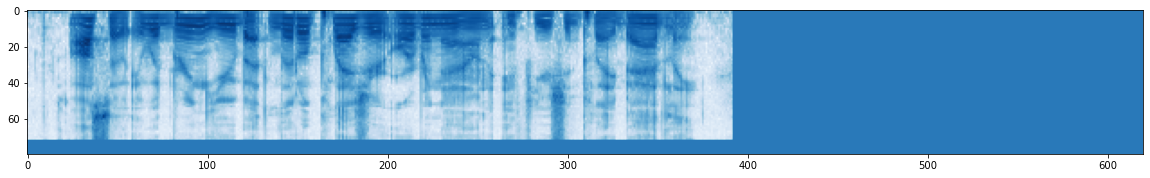

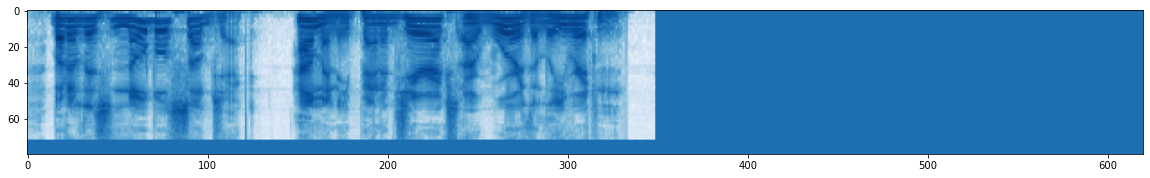

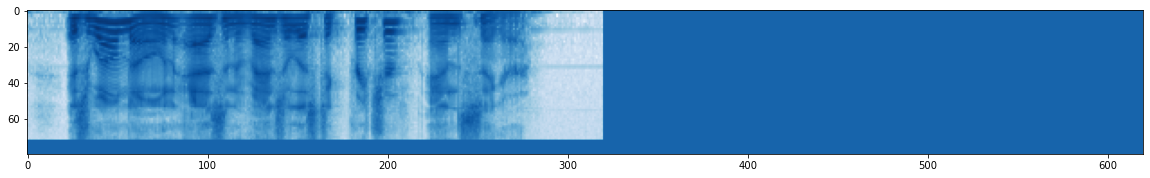

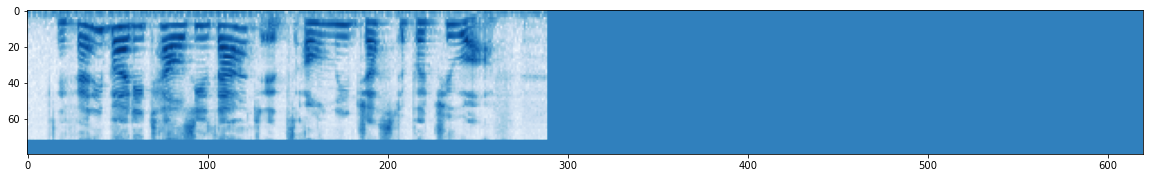

<Figure size 1440x360 with 0 Axes>

In [4]:
%run FastAutoAugment/train_ASR.py --config ASR/config/libri/asr_example.yaml --seed 0

In [10]:
%run FastAutoAugment/augmentations.py

{'ShearX': (<function ShearX at 0x7fd399497940>, -0.3, 0.3), 'ShearY': (<function ShearY at 0x7fd3990e7b80>, -0.3, 0.3), 'TranslateX': (<function TranslateX at 0x7fd3990e7ca0>, -0.45, 0.45), 'TranslateY': (<function TranslateY at 0x7fd39948eca0>, -0.45, 0.45), 'Rotate': (<function Rotate at 0x7fd39948ee50>, -30, 30), 'AutoContrast': (<function AutoContrast at 0x7fd39948eee0>, 0, 1), 'Invert': (<function Invert at 0x7fd39948ef70>, 0, 1), 'Equalize': (<function Equalize at 0x7fd399152040>, 0, 1), 'Solarize': (<function Solarize at 0x7fd399152160>, 0, 256), 'Posterize': (<function Posterize at 0x7fd3991521f0>, 4, 8), 'Contrast': (<function Contrast at 0x7fd399152310>, 0.1, 1.9), 'Color': (<function Color at 0x7fd3991523a0>, 0.1, 1.9), 'Brightness': (<function Brightness at 0x7fd399152430>, 0.1, 1.9), 'Sharpness': (<function Sharpness at 0x7fd3991524c0>, 0.1, 1.9), 'Cutout': (<function Cutout at 0x7fd399152550>, 0, 0.2), 'CutoutAbs': (<function CutoutAbs at 0x7fd3991525e0>, 0, 20), 'Poster

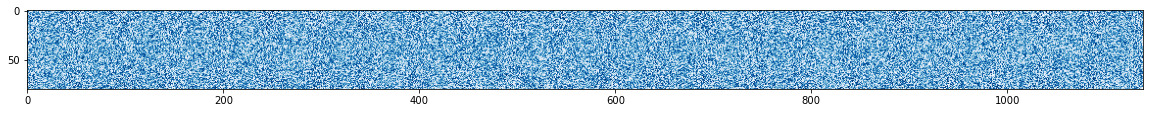

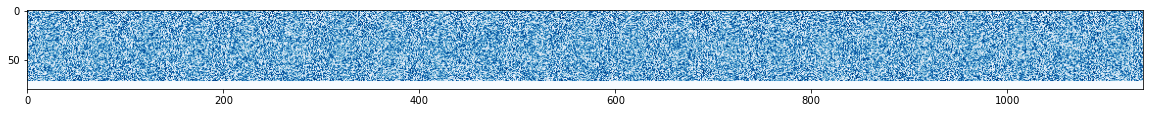

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio

v = 0.1
x = torch.rand(1139, 80)
w ,h = x.shape
freq_warp_value = int (h * v)
x = x.reshape(1,1,w, h)
plt.imshow(x[0][0].t().numpy(), cmap='Blues')
plt.show()
resized_img = F.interpolate(x, [w,h-freq_warp_value]) 
resized_img = resized_img[0][0]
out = F.pad(input=resized_img, pad=(0, freq_warp_value, 0, 0), mode='constant', value=0)
plt.imshow(out.t().numpy(), cmap='Blues')
plt.show()

In [209]:
x.shape

torch.Size([1, 1, 1139, 80])

In [210]:
v = 0.1
x = torch.rand(1139, 80)
w ,h = x.shape
time_warp_value = int (w * v)
x = x.reshape(1,1,w, h)
plt.imshow(x[0][0].t().numpy(), cmap='Blues')
plt.show()
resized_img = F.interpolate(x, [w - time_warp_value,h]) 
resized_img = resized_img[0][0]
out = F.pad(input=resized_img, pad=(0, 0, 0, time_warp_value), mode='constant', value=0)
plt.imshow(out.t().numpy(), cmap='Blues')
plt.show()

In [211]:
out.shape

torch.Size([1139, 80])

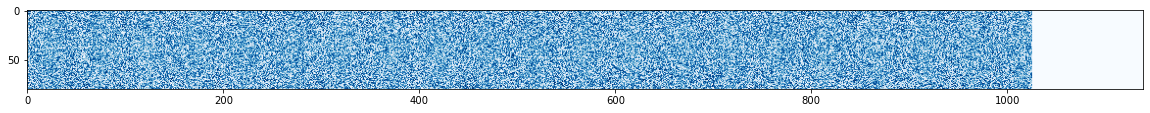

1139
tensor([1.1647])
tensor(1.7881e-07)
442 562


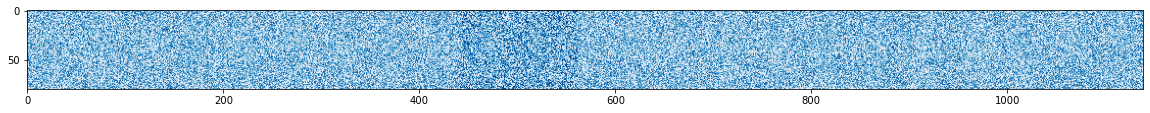

tensor([[0.0486, 0.3105, 0.9747,  ..., 0.2675, 0.7633, 0.2377],
        [0.4474, 0.5056, 0.0193,  ..., 0.4700, 0.1693, 0.3588],
        [0.0097, 0.9799, 0.3114,  ..., 0.8488, 0.1000, 0.2992],
        ...,
        [0.9918, 0.8919, 0.6725,  ..., 0.2413, 0.0876, 0.7017],
        [0.7265, 0.7409, 0.8444,  ..., 0.6092, 0.2446, 0.5342],
        [0.1284, 0.7234, 0.5265,  ..., 0.2350, 0.5718, 0.6301]])
tensor([[0.0393, 0.4540, 0.2643,  ..., 1.0825, 1.0307, 0.7395],
        [0.1555, 0.8731, 0.8437,  ..., 0.2125, 1.0399, 0.1718],
        [1.0406, 0.0543, 0.5805,  ..., 0.7045, 0.9428, 0.2612],
        ...,
        [0.0381, 1.0882, 1.0737,  ..., 0.7201, 0.4194, 0.9993],
        [1.1182, 1.1172, 0.1209,  ..., 1.0288, 0.6080, 0.1179],
        [1.0647, 1.0040, 0.4459,  ..., 0.0020, 1.0223, 0.9415]])


In [16]:
v = 2.0
all_frames_num  = x.size(0)
print(all_frames_num)
loudness_level = (v - 0.5) * torch.rand(1) + 0.5
print(loudness_level)

min_value = torch.min(x)
x = x - min_value
print(min_value)
time_start = (0.8 - 0.2) * torch.rand(1) + 0.2
time_end = (0.8 - time_start) * torch.rand(1) + time_start
time_start = int (time_start * all_frames_num)
time_end = int(time_end * all_frames_num)

print(time_start,time_end)
x[time_start:time_end,:] = x[time_start:time_end,:] * loudness_level 
x = x + min_value
plt.imshow(x.t().numpy(), cmap='Blues')
plt.show()
print(x)
print(x[time_start:time_end,:])

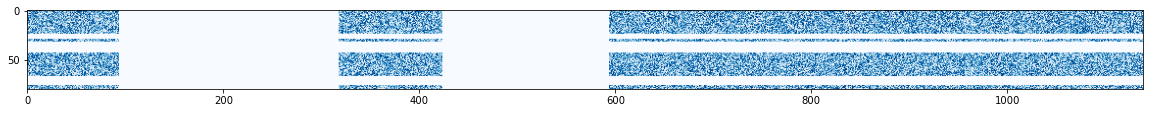

In [53]:
v = 0.15
freq_percentage = (v - 0.0) * torch.rand(1) + 0.0
all_freqs_num = x.size(1)
num_freqs_to_mask = int(freq_percentage * all_freqs_num)
f0 = (all_freqs_num - num_freqs_to_mask- 0.0) * torch.rand(1) + 0.0 
f0 = int(f0)
x[: , f0:f0 + num_freqs_to_mask] = 0

v = 0.2
time_percentage = (v - 0.0) * torch.rand(1) + 0.0
all_frames_num  = x.size(0)
num_frames_to_mask = int(time_percentage * all_frames_num)
t0 = (all_frames_num - num_frames_to_mask- 0.0) * torch.rand(1) + 0.0 
t0 = int(t0)
x[t0:t0 + num_frames_to_mask , :] = 0

plt.imshow(x.t().numpy(), cmap='Blues')
plt.show()


80
7


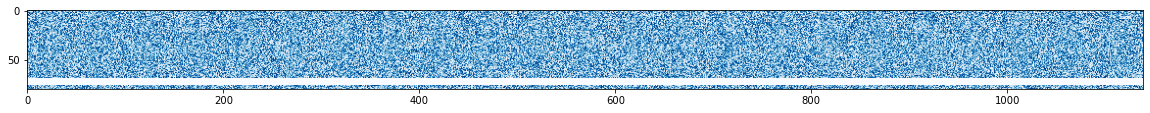

In [23]:
v = 0.15
freq_percentage = (v - 0.0) * torch.rand(1) + 0.0
all_freqs_num = x.size(1)

num_freqs_to_mask = int(freq_percentage * all_freqs_num)

print(all_freqs_num)
print(num_freqs_to_mask)

f0 = (all_freqs_num - num_freqs_to_mask- 0.0) * torch.rand(1) + 0.0 
f0 = int(f0)
x[: , f0:f0 + num_freqs_to_mask] = 0

plt.imshow(x.t().numpy(), cmap='Blues')
plt.show()


1139
153


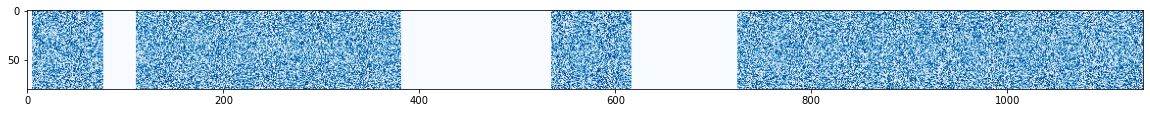

In [33]:
v = 0.2
time_percentage = (v - 0.0) * torch.rand(1) + 0.0
all_frames_num  = x.size(0)

num_frames_to_mask = int(time_percentage * all_frames_num)

print(all_frames_num)
print(num_frames_to_mask)

t0 = (all_frames_num - num_frames_to_mask- 0.0) * torch.rand(1) + 0.0 
t0 = int(t0)
x[t0:t0 + num_frames_to_mask , :] = 0
plt.imshow(x.t().numpy(), cmap='Blues')
plt.show()

In [1]:
%run FastAutoAugment/test.py -c confs/wresnet40x2_cifar.yaml

[2021-02-25 13:00:36,616] [Fast AutoAugment] [INFO] augmentation: fa_reduced_cifar10


Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
)
[['ShearY', 0.7717126261142194, 0.09975547983707711], ['Equalize', 0.7808494401429572, 0.4141412091009955]]
[['Equalize', 0.9139902833674455, 0.9015103149680278], ['Sharpness', 0.7289667720691948, 0.7623606352376232]]
Files already downloaded and verified
Files already downloaded and verified
128
torch.Size([3, 32, 32])


In [ ]:
%run FastAutoAugment/train.py -c confs/wresnet40x2_cifar.yaml --aug fa_reduced_cifar10 --dataset cifar10

[2021-02-25 10:03:56,587] [Fast AutoAugment] [INFO] checkpoint will be saved at test.pth


Extracting ./data/private/pretrainedmodels/cifar-10-python.tar.gz to ./data/private/pretrainedmodels
Files already downloaded and verified


[2021-02-25 10:05:06,879] [Fast AutoAugment] [WARNING] tag not provided, no tensorboard log.


[train 0001/0200]:   0%|          | 0/390 [00:01<?, ?it/s, loss=2.46, top1=0.0938, top5=0.461, lr=0, loss_ema=2.46]/home/zwan074/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
[train 0001/0200]:  12%|█▏        | 46/390 [00:12<01:10,  4.87it/s, loss=2.41, top1=0.116, top5=0.553, lr=0.00231, loss_ema=2.38]  

In [1]:
%run FastAutoAugment/train.py -c confs/wresnet40x2_cifar.yaml --aug fa_reduced_cifar10 --dataset cifar10 --only-eval --save test.pth

Files already downloaded and verified
Files already downloaded and verified


[2021-02-10 10:59:05,263] [Fast AutoAugment] [WARNING] tag not provided, no tensorboard log.
[2021-02-10 10:59:05,263] [Fast AutoAugment] [INFO] evaluation only+
[train 0000/0200]: 100%|████████████| 390/390 [00:41<00:00,  9.50it/s, loss=2.31, top1=0.089, top5=0.509, loss_ema=2.3]
[valid 0000/0200]: : 0it [00:00, ?it/s]
[*test 0000/0200]: 100%|████████████| 79/79 [00:05<00:00, 13.56it/s, loss=2.31, top1=0.0756, top5=0.509, loss_ema=2.31]
[2021-02-10 10:59:52,185] [Fast AutoAugment] [INFO] done.
[2021-02-10 10:59:52,185] [Fast AutoAugment] [INFO] model: {'type': 'wresnet40_2'}
[2021-02-10 10:59:52,185] [Fast AutoAugment] [INFO] augmentation: fa_reduced_cifar10
[2021-02-10 10:59:52,185] [Fast AutoAugment] [INFO] 
{
    "loss_train": 2.3058977145415085,
    "loss_valid": 0.0,
    "loss_test": 2.307762661743164,
    "top1_train": 0.0889823717948718,
    "top1_valid": 0.0,
    "top1_test": 0.0756,
    "top5_train": 0.5090144230769231,
    "top5_valid": 0.0,
    "top5_test": 0.5086,
    "epo

In [ ]:
%run FastAutoAugment/search.py -c confs/wresnet40x2_cifar.yaml

[2021-02-25 11:56:13,896] [Fast AutoAugment] [INFO] configuration...
[2021-02-25 11:56:13,898] [Fast AutoAugment] [INFO] {
    "_timestamp": "2021/02/25 11:56:13",
    "_version": 1,
    "aug": "fa_reduced_cifar10",
    "batch": 128,
    "config": "confs/wresnet40x2_cifar.yaml",
    "cutout": 16,
    "cv": {
        "ratio": 0.4
    },
    "dataroot": "./data/private/pretrainedmodels",
    "dataset": "cifar10",
    "decay": -1,
    "epoch": 200,
    "lr": 0.1,
    "lr_schedule": {
        "type": "cosine",
        "warmup": {
            "epoch": 5,
            "multiplier": 1
        }
    },
    "model": {
        "type": "wresnet40_2"
    },
    "num": {
        "op": 2,
        "policy": 5,
        "search": 200
    },
    "optimizer": {
        "decay": 0.0002,
        "ema": 0,
        "nesterov": true,
        "type": "sgd"
    },
    "per": {
        "class": false
    },
    "redis": "gpu-cloud-vnode30.dakao.io:23655",
    "resume": false,
    "smoke": {
        "test": false


search_cifar10_wresnet40_2_fold0_ratio0.4
{'dataroot': '/media/zwan074/Untitled/fast-autoaugment-master/data/private/pretrainedmodels', 'save_path': '/media/zwan074/Untitled/fast-autoaugment-master/models/cifar10wresnet40_2ratio0.4_fold0.model', 'cv_ratio_test': 0.4, 'cv_fold': 0, 'num_op': 2, 'num_policy': 5}


(pid=12340) {'dataroot': '/media/zwan074/Untitled/fast-autoaugment-master/data/private/pretrainedmodels', 'save_path': '/media/zwan074/Untitled/fast-autoaugment-master/models/cifar10wresnet40_2ratio0.4_fold0.model', 'cv_ratio_test': 0.4, 'cv_fold': 0, 'num_op': 2, 'num_policy': 5, 'level_0_0': 0.642501198097146, 'level_0_1': 0.6950314046114952, 'level_1_0': 0.11677265208027976, 'level_1_1': 0.33590286582716455, 'level_2_0': 0.7433446277948489, 'level_2_1': 0.8128340100442064, 'level_3_0': 0.4161608032158043, 'level_3_1': 0.30036618859892283, 'level_4_0': 0.6959052547196591, 'level_4_1': 0.8569628724592162, 'policy_0_0': 4, 'policy_0_1': 11, 'policy_1_0': 0, 'policy_1_1': 0, 'policy_2_0': 14, 'policy_2_1': 2, 'policy_3_0': 14, 'policy_3_1': 12, 'policy_4_0': 11, 'policy_4_1': 3, 'prob_0_0': 0.6056195284420522, 'prob_0_1': 0.8644546702654105, 'prob_1_0': 0.2183734495500289, 'prob_1_1': 0.5416613738082305, 'prob_2_0': 0.4577810272029521, 'prob_2_1': 0.2943321563005672, 'prob_3_0': 0.93906

(pid=12390) {'dataroot': '/media/zwan074/Untitled/fast-autoaugment-master/data/private/pretrainedmodels', 'save_path': '/media/zwan074/Untitled/fast-autoaugment-master/models/cifar10wresnet40_2ratio0.4_fold0.model', 'cv_ratio_test': 0.4, 'cv_fold': 0, 'num_op': 2, 'num_policy': 5, 'level_0_0': 0.34907451230375075, 'level_0_1': 0.10286959972281784, 'level_1_0': 0.08168522772080367, 'level_1_1': 0.3364566211807747, 'level_2_0': 0.7772276103156003, 'level_2_1': 0.13916550896621105, 'level_3_0': 0.1832417528532032, 'level_3_1': 0.8265128898622364, 'level_4_0': 0.18725142763561142, 'level_4_1': 0.5339191512945691, 'policy_0_0': 14, 'policy_0_1': 9, 'policy_1_0': 6, 'policy_1_1': 3, 'policy_2_0': 1, 'policy_2_1': 11, 'policy_3_0': 10, 'policy_3_1': 9, 'policy_4_0': 10, 'policy_4_1': 7, 'prob_0_0': 0.8118175138307555, 'prob_0_1': 0.04721463586472696, 'prob_1_0': 0.5249343906615899, 'prob_1_1': 0.5571166451116462, 'prob_2_0': 0.003180257954096821, 'prob_2_1': 0.2792005849420943, 'prob_3_0': 0.

2021-02-25 11:59:11,756	INFO tune.py:450 -- Total run time: 175.83 seconds (175.77 seconds for the tuning loop).
[2021-02-25 11:59:11,781] [Fast AutoAugment] [INFO] loss=-0.000000000018 top1_valid=0.9834 [[('Rotate', 0.6056195284420522, 0.642501198097146), ('Color', 0.8644546702654105, 0.6950314046114952)], [('ShearX', 0.2183734495500289, 0.11677265208027976), ('ShearX', 0.5416613738082305, 0.33590286582716455)], [('Cutout', 0.4577810272029521, 0.7433446277948489), ('TranslateX', 0.2943321563005672, 0.8128340100442064)], [('Cutout', 0.93906088587186, 0.4161608032158043), ('Brightness', 0.029032751634775145, 0.30036618859892283)], [('Color', 0.14723534051585496, 0.6959052547196591), ('TranslateY', 0.07198220212707884, 0.8569628724592162)]]


[2021-02-25 11:59:12,145] [Fast AutoAugment] [INFO] loss=-0.000000000018 top1_valid=0.9823 [[('Cutout', 0.8118175138307555, 0.34907451230375075), ('Posterize', 0.04721463586472696, 0.10286959972281784)], [('Invert', 0.5249343906615899, 0.08168522772080367), ('TranslateY', 0.5571166451116462, 0.3364566211807747)], [('ShearY', 0.003180257954096821, 0.7772276103156003), ('Color', 0.2792005849420943, 0.13916550896621105)], [('Contrast', 0.1079498497989857, 0.1832417528532032), ('Posterize', 0.1714320944981409, 0.8265128898622364)], [('Contrast', 0.6972407806598622, 0.18725142763561142), ('Equalize', 0.8196015596842895, 0.5339191512945691)]]
2021-02-25 11:59:12,147	WARNING suggestion.py:88 -- DeprecationWarning: `max_concurrent` is deprecated for this search algorithm. Use tune.suggest.ConcurrencyLimiter() instead. This will raise an error in future versions of Ray.


search_cifar10_wresnet40_2_fold1_ratio0.4
{'dataroot': '/media/zwan074/Untitled/fast-autoaugment-master/data/private/pretrainedmodels', 'save_path': '/media/zwan074/Untitled/fast-autoaugment-master/models/cifar10wresnet40_2ratio0.4_fold1.model', 'cv_ratio_test': 0.4, 'cv_fold': 1, 'num_op': 2, 'num_policy': 5}


(pid=12494) {'dataroot': '/media/zwan074/Untitled/fast-autoaugment-master/data/private/pretrainedmodels', 'save_path': '/media/zwan074/Untitled/fast-autoaugment-master/models/cifar10wresnet40_2ratio0.4_fold1.model', 'cv_ratio_test': 0.4, 'cv_fold': 1, 'num_op': 2, 'num_policy': 5, 'level_0_0': 0.6547077055761351, 'level_0_1': 0.7619392405994, 'level_1_0': 0.1473898469394026, 'level_1_1': 0.23099662813567112, 'level_2_0': 0.006456076974791891, 'level_2_1': 0.8856569946667571, 'level_3_0': 0.8457987370119184, 'level_3_1': 0.9223616248099561, 'level_4_0': 0.03323230514215514, 'level_4_1': 0.479343773653674, 'policy_0_0': 0, 'policy_0_1': 10, 'policy_1_0': 12, 'policy_1_1': 12, 'policy_2_0': 12, 'policy_2_1': 11, 'policy_3_0': 7, 'policy_3_1': 6, 'policy_4_0': 7, 'policy_4_1': 1, 'prob_0_0': 0.6227692442776154, 'prob_0_1': 0.9229283841903649, 'prob_1_0': 0.033457821965717005, 'prob_1_1': 0.2505635842682099, 'prob_2_0': 0.4744411106262231, 'prob_2_1': 0.6560847268024431, 'prob_3_0': 0.57222

In [3]:
import pandas as pd

In [4]:
dataframe = pd.read_csv('test.csv')

In [5]:
dataframe

Unnamed: 0    minus_loss  top1_valid  elapsed_time  done  time_this_iter_s  \
0           0 -2.980232e-11      0.9823      84.91709  True         96.749476   

   timesteps_total  episodes_total  training_iteration  \
0              NaN             NaN                   1   

                      experiment_id  ... config/prob_1_0  config/prob_1_1  \
0  ad51fd0f4350450ebabf45a521a83edd  ...         0.46254         0.850179   

   config/prob_2_0  config/prob_2_1 config/prob_3_0 config/prob_3_1  \
0         0.597299         0.451236         0.73247        0.631854   

   config/prob_4_0  config/prob_4_1  \
0         0.505176         0.664074   

                                    config/save_path  \
0  D:/CS/Master Project/Augmentation/fast-autoaug...   

                                              logdir  
0  C:\Users\Vincent\ray_results\eval_t_2021-02-13...  

[1 rows x 58 columns]

In [14]:
for i in range(10):
    try:
        config_dict = dataframe.loc[i].filter(like='config').to_dict()
        new_keys = [x.replace('config/', '') for x in config_dict.keys()]
        new_config_dict = {}
        for key in new_keys:
            new_config_dict[key] = config_dict['config/' + key]
    except:
        continue

In [15]:
new_config_dict

{'cv_fold': 0,
 'cv_ratio_test': 0.4,
 'dataroot': '/data/private/pretrainedmodels',
 'level_0_0': 0.6671435645125918,
 'level_0_1': 0.25294569318136506,
 'level_1_0': 0.6549531635642494,
 'level_1_1': 0.43447910049035054,
 'level_2_0': 0.3347956733634785,
 'level_2_1': 0.640972728181989,
 'level_3_0': 0.5848271343014206,
 'level_3_1': 0.16381429223424793,
 'level_4_0': 0.35932002491208137,
 'level_4_1': 0.6569158690596391,
 'num_op': 2,
 'num_policy': 5,
 'policy_0_0': 8,
 'policy_0_1': 0,
 'policy_1_0': 3,
 'policy_1_1': 1,
 'policy_2_0': 9,
 'policy_2_1': 12,
 'policy_3_0': 5,
 'policy_3_1': 11,
 'policy_4_0': 4,
 'policy_4_1': 13,
 'prob_0_0': 0.6108153351156065,
 'prob_0_1': 0.460570248823796,
 'prob_1_0': 0.4625398458427194,
 'prob_1_1': 0.8501788625903611,
 'prob_2_0': 0.597299266671197,
 'prob_2_1': 0.4512364399618646,
 'prob_3_0': 0.7324698834005722,
 'prob_3_1': 0.631854463766581,
 'prob_4_0': 0.5051763208521424,
 'prob_4_1': 0.6640743836042696,
 'save_path': 'D:/CS/Master Pr

In [9]:
new_keys

['cv_fold',
 'cv_ratio_test',
 'dataroot',
 'level_0_0',
 'level_0_1',
 'level_1_0',
 'level_1_1',
 'level_2_0',
 'level_2_1',
 'level_3_0',
 'level_3_1',
 'level_4_0',
 'level_4_1',
 'num_op',
 'num_policy',
 'policy_0_0',
 'policy_0_1',
 'policy_1_0',
 'policy_1_1',
 'policy_2_0',
 'policy_2_1',
 'policy_3_0',
 'policy_3_1',
 'policy_4_0',
 'policy_4_1',
 'prob_0_0',
 'prob_0_1',
 'prob_1_0',
 'prob_1_1',
 'prob_2_0',
 'prob_2_1',
 'prob_3_0',
 'prob_3_1',
 'prob_4_0',
 'prob_4_1',
 'save_path']